In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

plt.style.use(['science','ieee', 'no-latex'])


df1 = pd.read_csv("../files/experiment_1/metrics_embl_inference_cluster_exp1_2cpu_3ram_30nodes.csv")
df2 = pd.read_csv("../files/experiment_1/metrics_embl_inference_cluster_exp1_3cpu_5ram_20nodes.csv")
df3 = pd.read_csv("../files/experiment_1/metrics_embl_inference_cluster_exp1_6cpu_10ram_10nodes.csv")

df = pd.concat([df1, df2, df3])
df.drop(columns=['Dataset size (bytes)'], inplace=True)

new_titles = {
    'Parallelism': 'Parallelism',
    'Num cpus': 'CPUs',
    'Memory': 'Memory',
    'Batch size map_batches()': 'Batch size',
    'Concurrency': 'Concurrency',
    'Num blocks dataset': 'Blocks dataset',
    'Total time w/o metadata fetching': 'Total time (w/o m. fetch)',
    'Total time': 'Total time',
    'Throughput w/o metadata fetching (img/sec)': 'Throughput (w/o m. fetch)',
    'Throughput (img/sec)': 'Throughput'
}
df = df.rename(columns=new_titles, index=new_titles)

def plot_correlation_heatmap(df, title):
    df = df.loc[:, df.nunique() > 1]
    correlation_matrix = df.corr(numeric_only=True)
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    f, ax = plt.subplots()
    plt.title(title)
    sns.heatmap(correlation_matrix, mask=mask, cmap="coolwarm", vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 5})
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([-1, 0, 1])
    cbar.set_ticklabels(['-1', '0', '1'])
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.show()


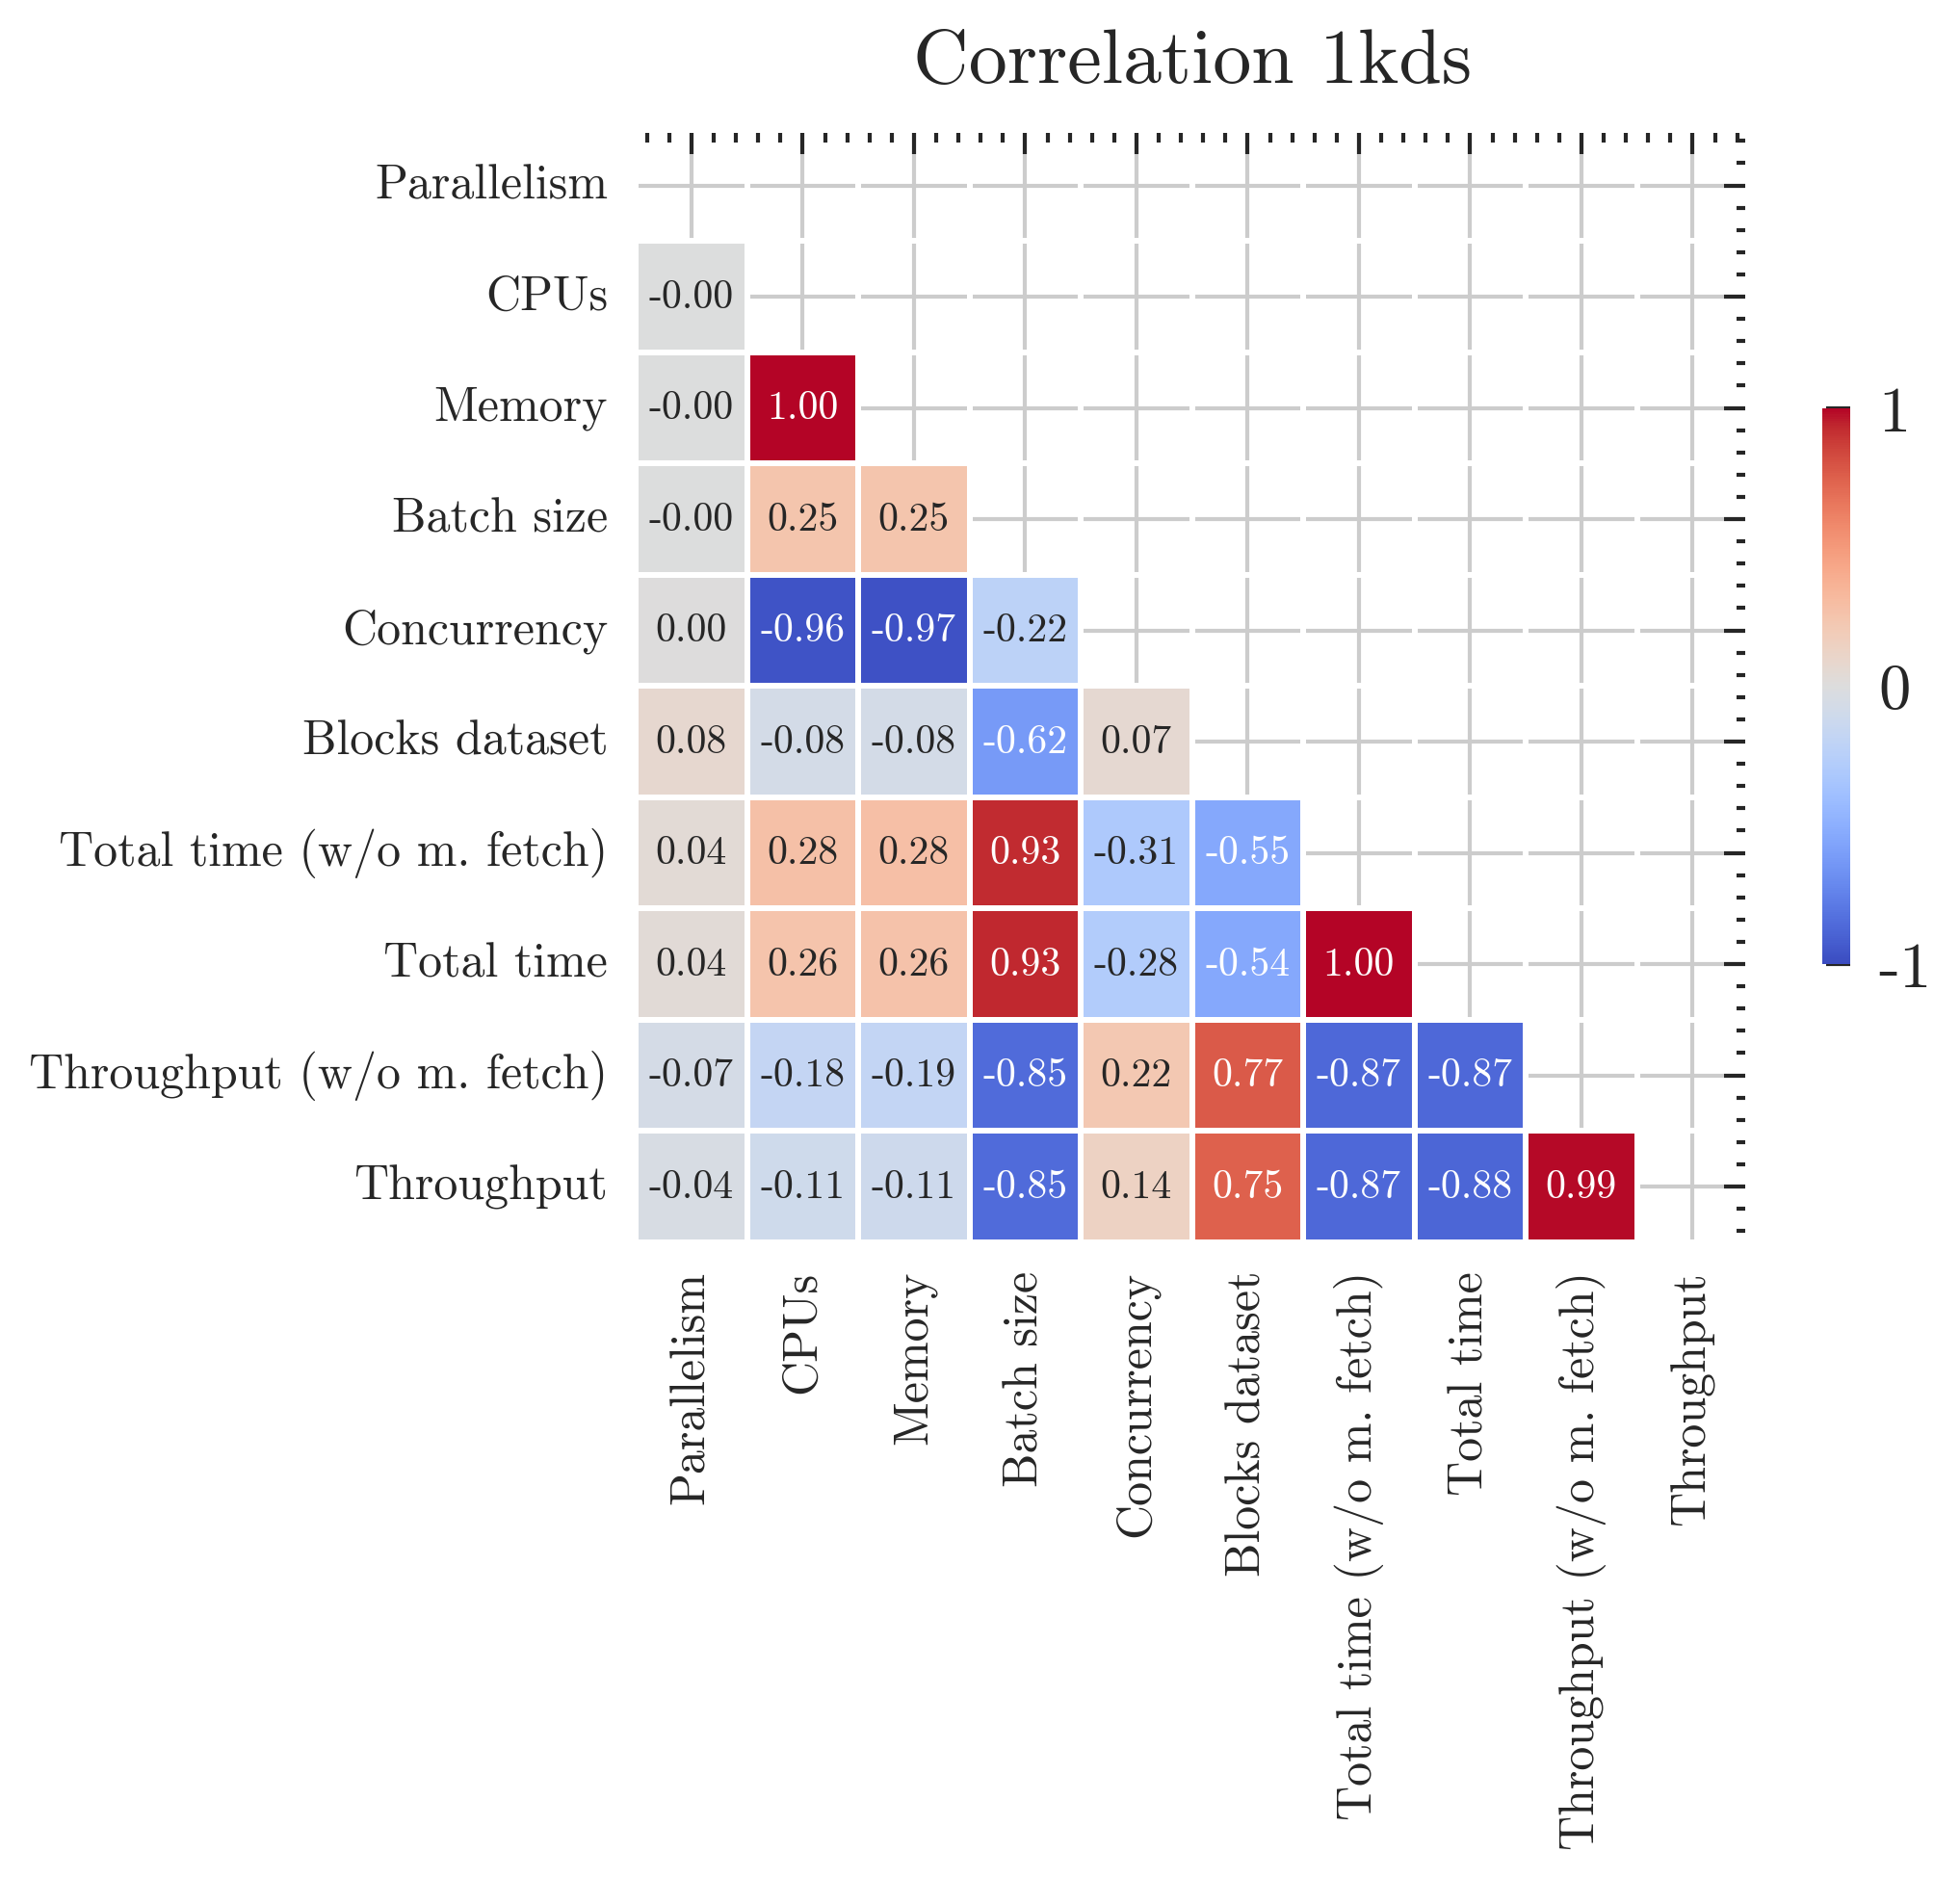

In [2]:
df_1kds = df[df['Dataset'] == '1kds']
plot_correlation_heatmap(df_1kds, 'Correlation 1kds')

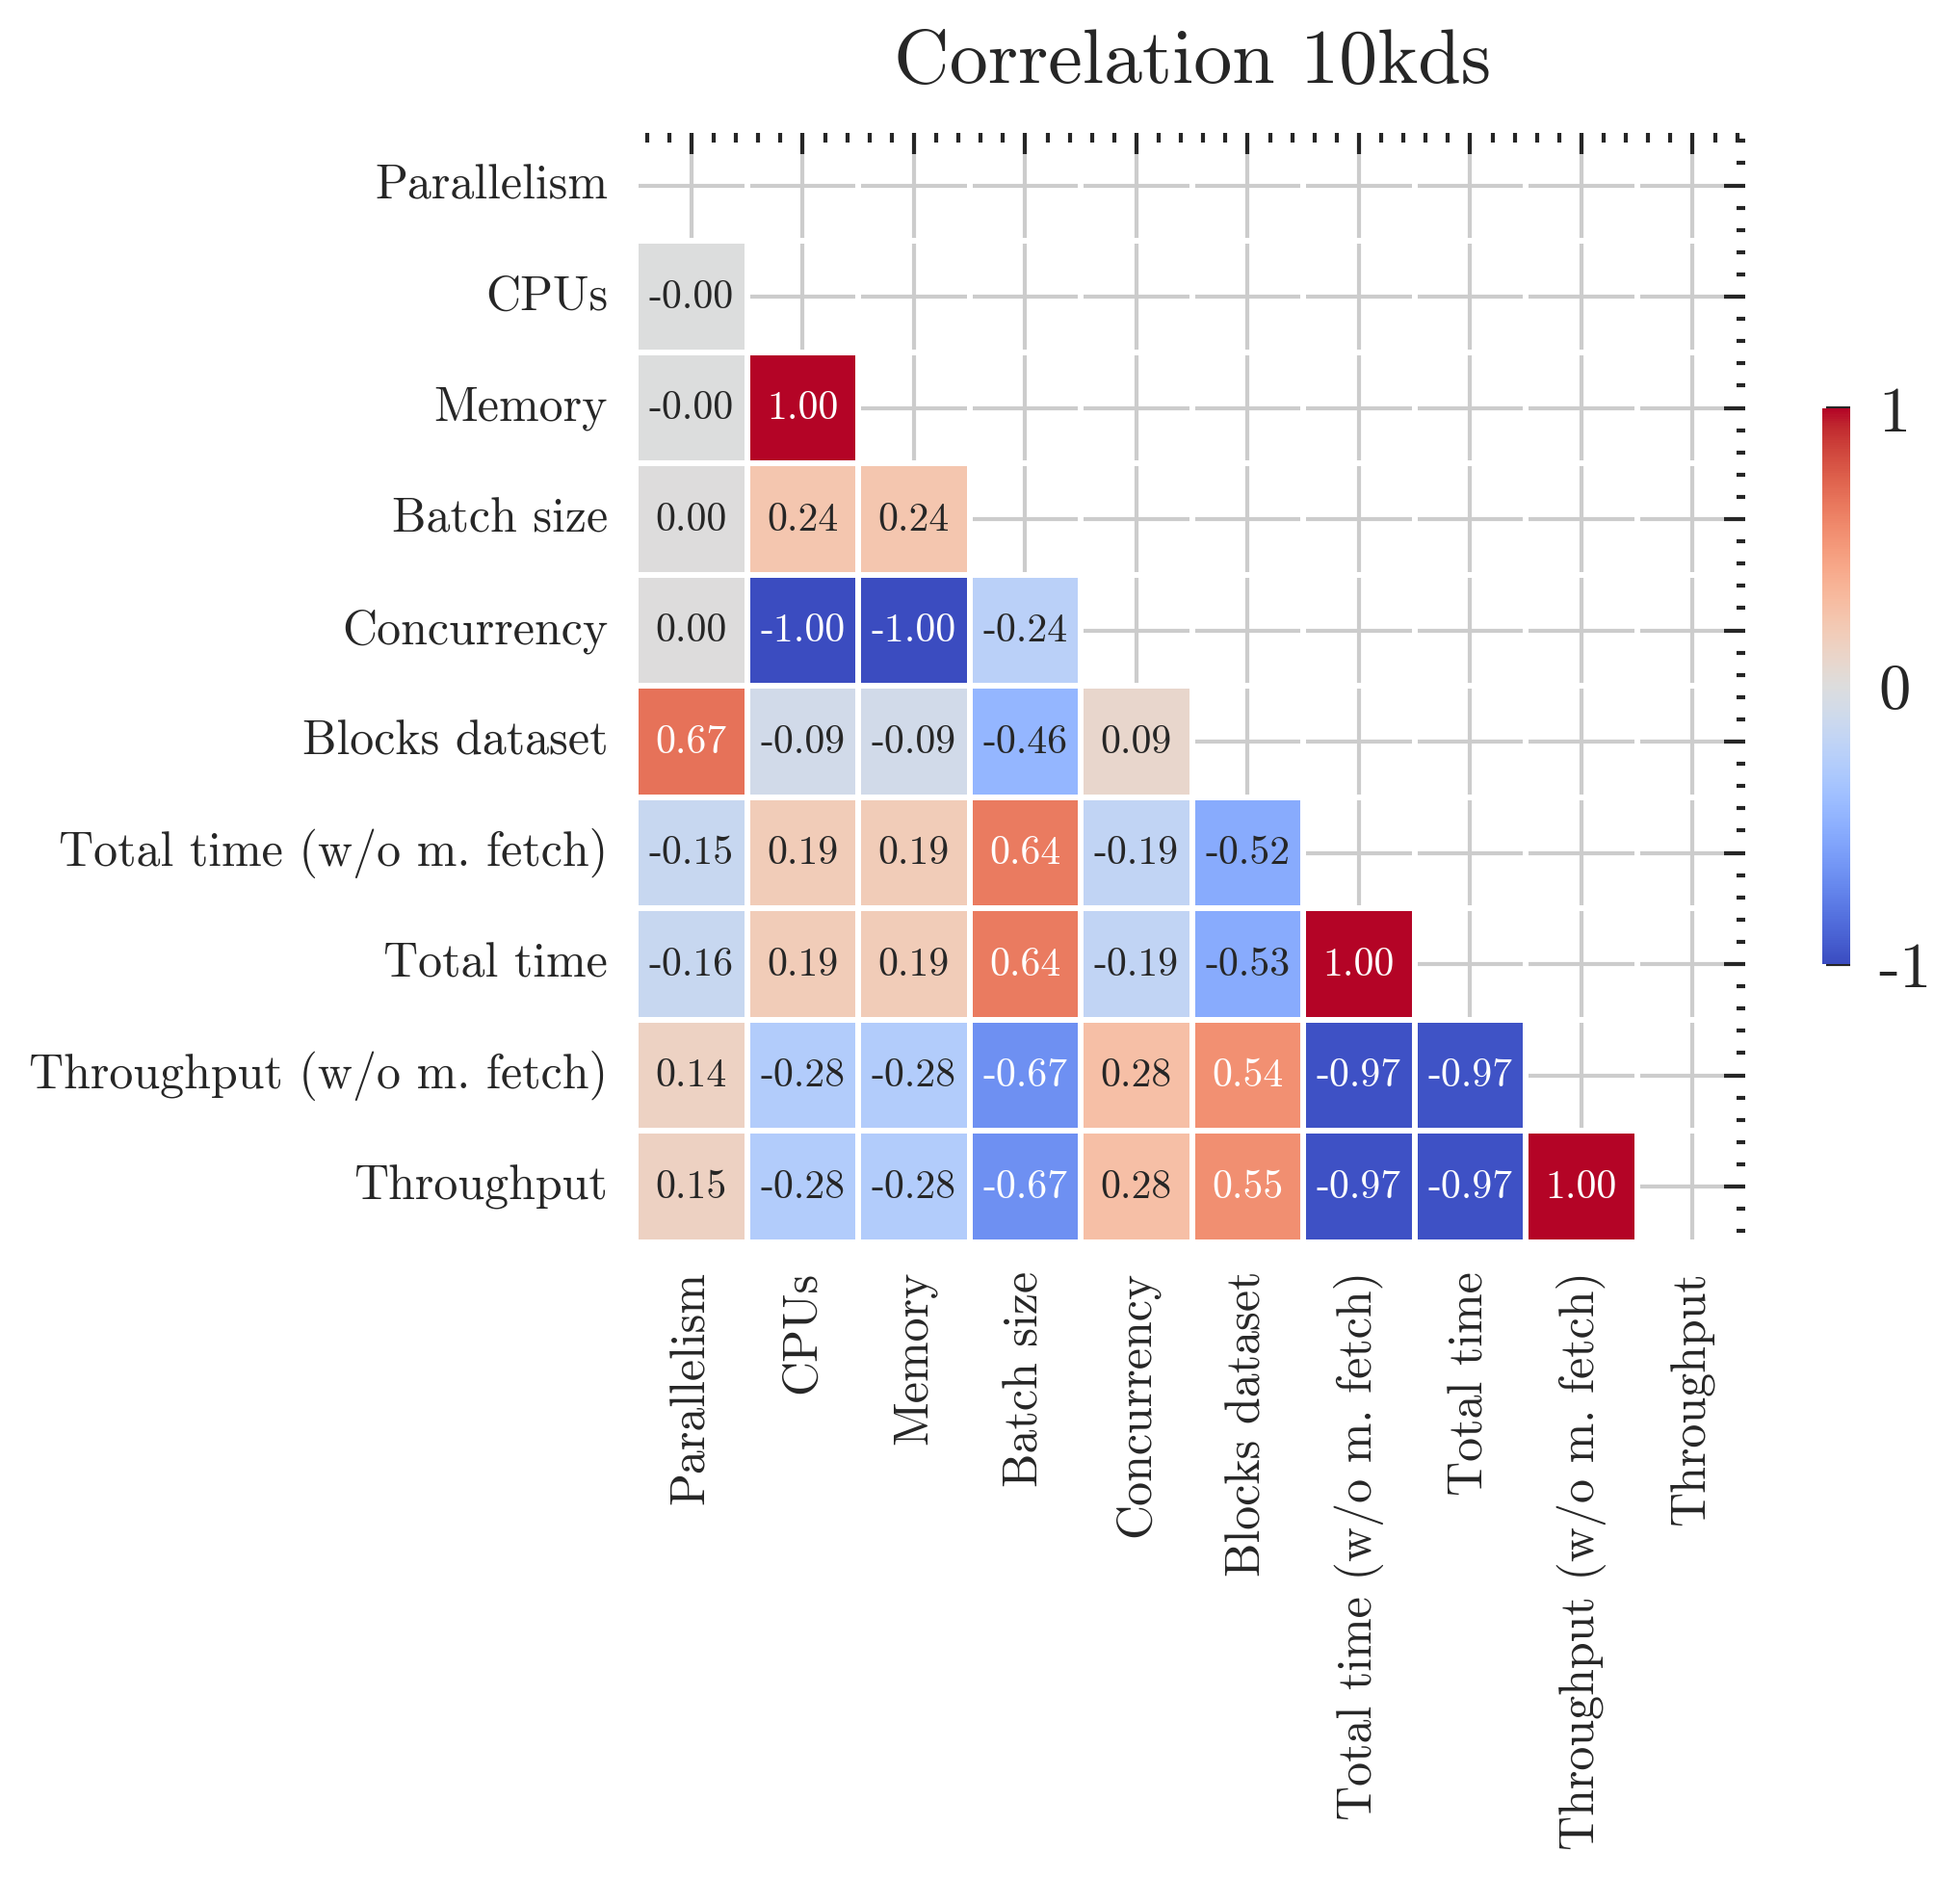

In [3]:
df_10kds = df[df['Dataset'] == '10kds']
plot_correlation_heatmap(df_10kds, 'Correlation 10kds')